Saving looking_out.jpg to looking_out.jpg
Loaded image: looking_out.jpg
Otsu Optimal Threshold = 101


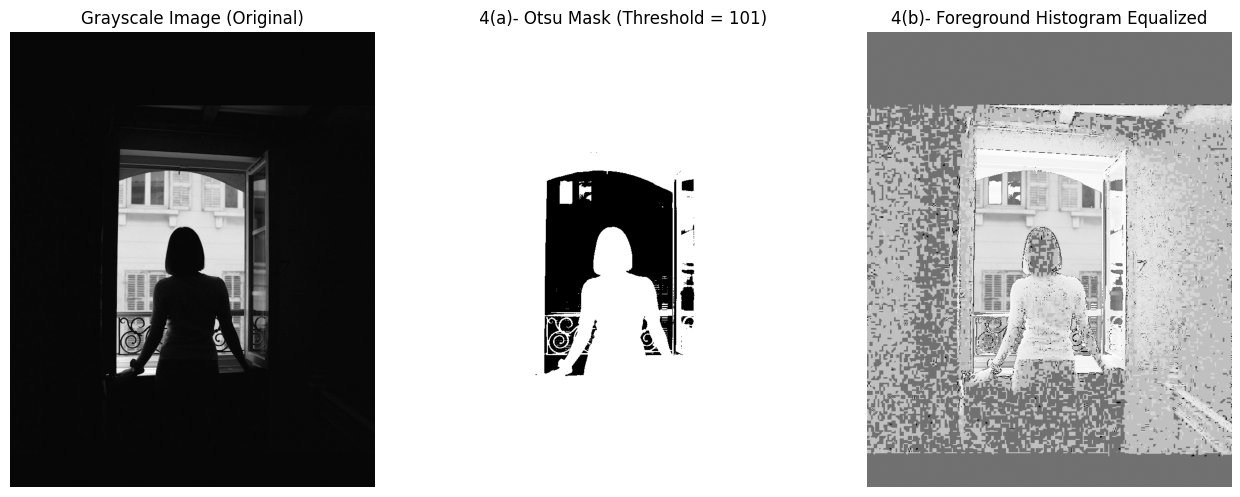

In [21]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload image
uploaded_files = files.upload()
image_name = list(uploaded_files.keys())[0]
print("Loaded image:", image_name)

# Load image in grayscale
gray_img = cv.imread(image_name, cv.IMREAD_GRAYSCALE)

if gray_img is None:
    print("ERROR: Image not found.")
else:
    # (a) Otsu Thresholding
    otsu_T, binary_mask = cv.threshold(gray_img, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    otsu_T = int(otsu_T)
    print(f"Otsu Optimal Threshold = {otsu_T}")

    # (b) Foreground-only Histogram Equalization
    fg_hist = cv.calcHist([gray_img], [0], binary_mask, [256], [0, 256])

    cdf_vals = fg_hist.cumsum()
    cdf_masked = np.ma.masked_equal(cdf_vals, 0)
    cdf_norm = (cdf_masked - cdf_masked.min()) * 255 / (cdf_masked.max() - cdf_masked.min())
    lookup_table = np.ma.filled(cdf_norm, 0).astype('uint8')

    equalized_img = cv.LUT(gray_img, lookup_table)

    # Combine equalized foreground + original background
    fg_part = cv.bitwise_and(equalized_img, equalized_img, mask=binary_mask)
    bg_part = cv.bitwise_and(gray_img, gray_img, mask=cv.bitwise_not(binary_mask))
    final_img = cv.add(fg_part, bg_part)

    # Display results
    plt.figure(figsize=(13, 5))

    #  Original
    plt.subplot(1, 3, 1)
    plt.imshow(gray_img, cmap='gray')
    plt.title('Grayscale Image (Original)')
    plt.axis('off')

    #  Part (a) Result
    plt.subplot(1, 3, 2)
    plt.imshow(binary_mask, cmap='gray')
    plt.title(f' 4(a)- Otsu Mask (Threshold = {otsu_T})')
    plt.axis('off')

    #  Part (b) Result
    plt.subplot(1, 3, 3)
    plt.imshow(final_img, cmap='gray')
    plt.title('4(b)- Foreground Histogram Equalized')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
